In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\ragha\Downloads\Contraceptive_method_dataset.xlsx")

In [3]:
# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [4]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [5]:
df.shape

(1473, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [7]:
df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


In [8]:
df.describe(include='all')

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
count,1402.000000,1473,1473,1452.000000,1473,1473,1473.000000,1473,1473,1473
unique,NaN,4,4,NaN,2,2,NaN,4,2,2
top,NaN,Tertiary,Tertiary,NaN,Scientology,No,NaN,Very High,Exposed,Yes
freq,NaN,577,899,NaN,1253,1104,NaN,684,1364,844
mean,32.606277,NaN,NaN,3.254132,NaN,NaN,2.137814,NaN,NaN,NaN
std,8.274927,NaN,NaN,2.365212,NaN,NaN,0.864857,NaN,NaN,NaN
min,16.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,26.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN
50%,32.000000,NaN,NaN,3.000000,NaN,NaN,2.000000,NaN,NaN,NaN
75%,39.000000,NaN,NaN,4.000000,NaN,NaN,3.000000,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [10]:
# Handle missing values by imputing the median for numerical columns
df['Wife_age'].fillna(df['Wife_age'].median(), inplace=True)
df['No_of_children_born'].fillna(df['No_of_children_born'].median(), inplace=True)

In [11]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [12]:
df.duplicated().sum()

85

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
# outliers treatment for wife_age and No_of_children_born

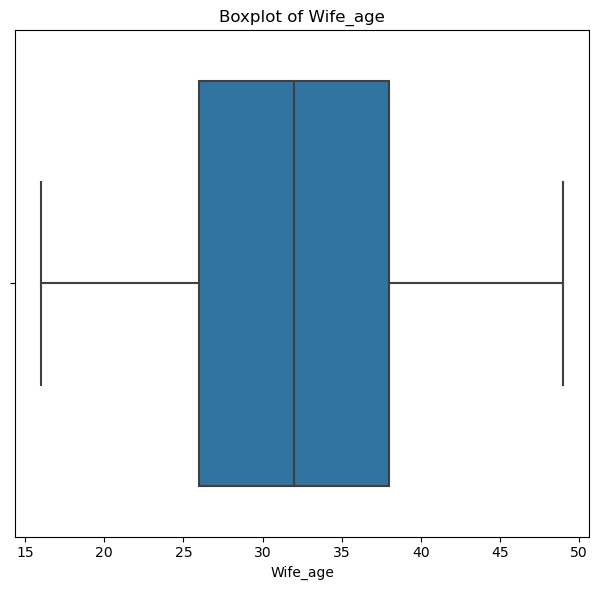

In [16]:
# Plot boxplots for numerical variables to identify outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Wife_age'])
plt.title('Boxplot of Wife_age')
plt.tight_layout()
plt.show()

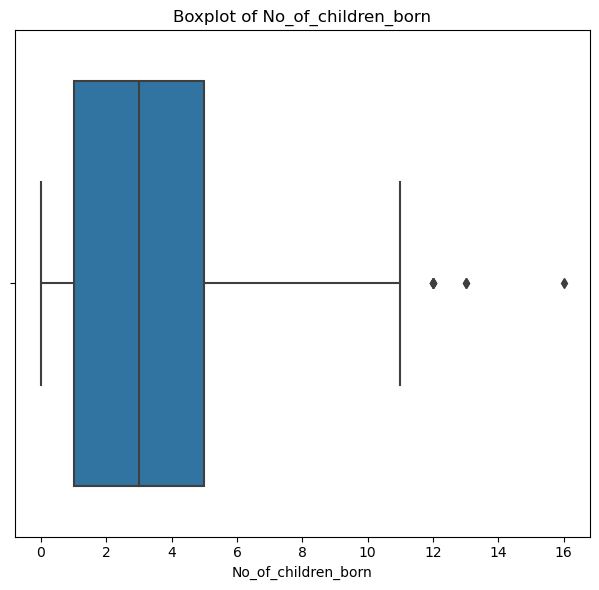

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x=df['No_of_children_born'])
plt.title('Boxplot of No_of_children_born')
plt.tight_layout()
plt.show()

In [18]:
# Univariate analysis

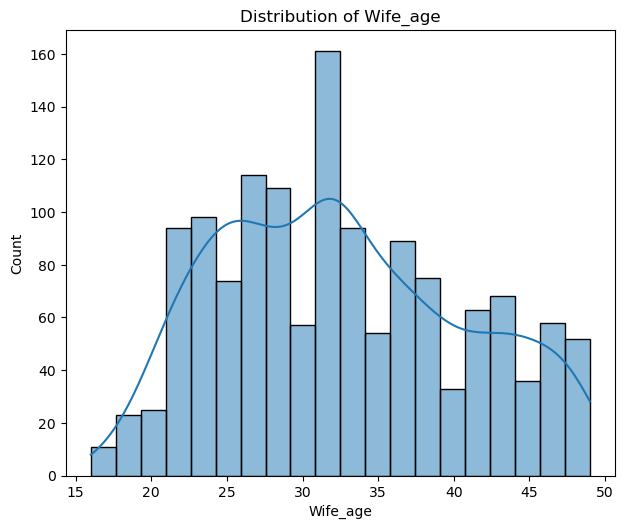

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Histogram for Wife_age
plt.subplot(2, 2, 1)
sns.histplot(df['Wife_age'], bins=20, kde=True)
plt.title('Distribution of Wife_age')
plt.tight_layout()
plt.show()

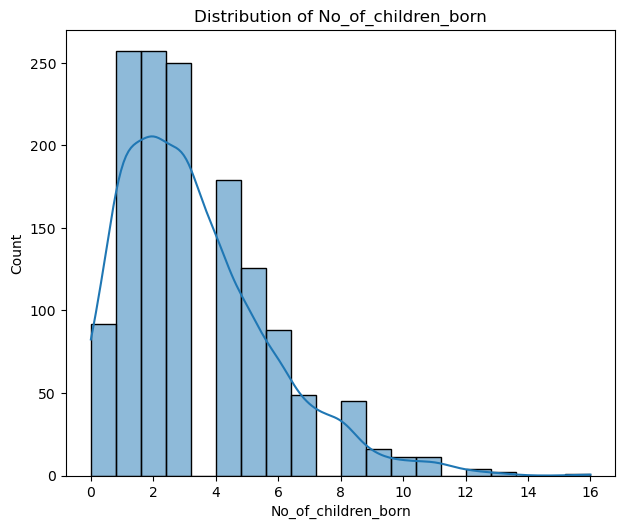

In [20]:
# Histogram for No_of_children_born
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['No_of_children_born'], bins=20, kde=True)
plt.title('Distribution of No_of_children_born')
plt.tight_layout()
plt.show()

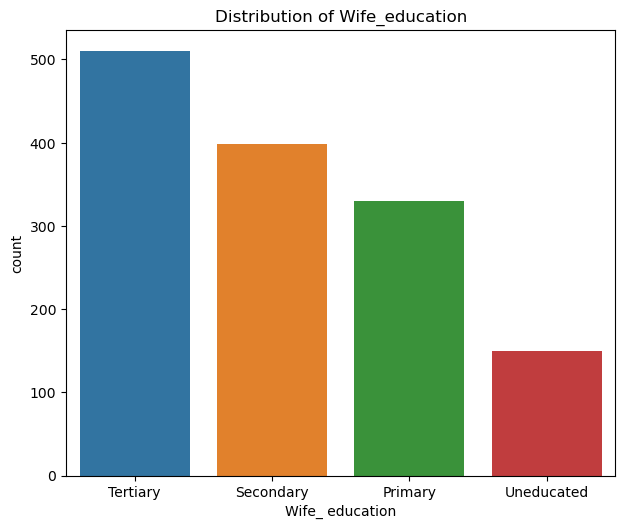

In [21]:
# Bar plot for Wife_education
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Wife_ education', order=df['Wife_ education'].value_counts().index)
plt.title('Distribution of Wife_education')
plt.tight_layout()
plt.show()

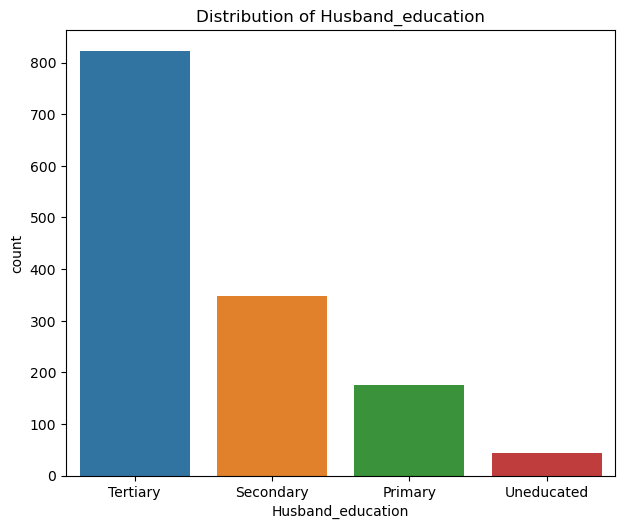

In [22]:
# Bar plot for Husband_education
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Husband_education', order=df['Husband_education'].value_counts().index)
plt.title('Distribution of Husband_education')
plt.tight_layout()
plt.show()

In [23]:
# Bivaraiate analysis

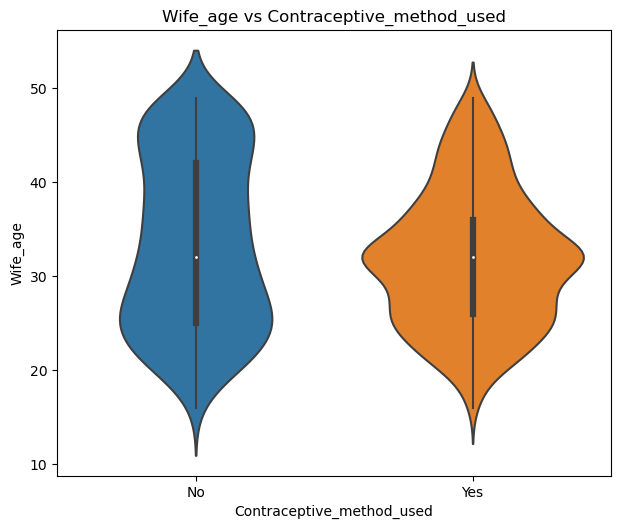

In [24]:
# Violin plot for Wife_age vs Contraceptive_method_used
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='Contraceptive_method_used', y='Wife_age')
plt.title('Wife_age vs Contraceptive_method_used')
plt.tight_layout()
plt.show()

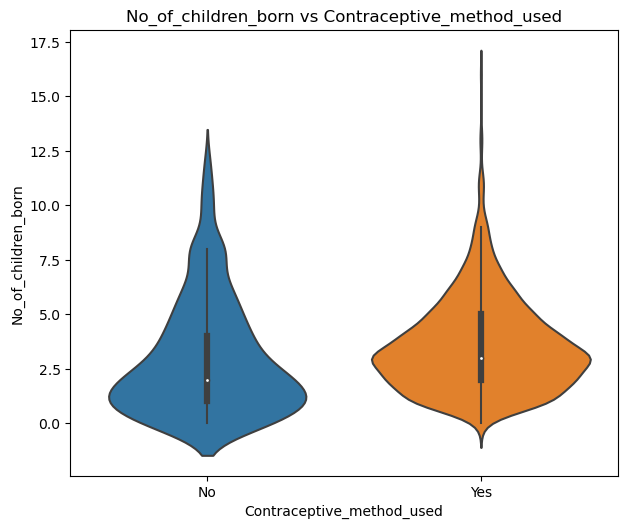

In [25]:
# Violin plot for No_of_children_born vs Contraceptive_method_used
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='Contraceptive_method_used', y='No_of_children_born')
plt.title('No_of_children_born vs Contraceptive_method_used')
plt.tight_layout()
plt.show()

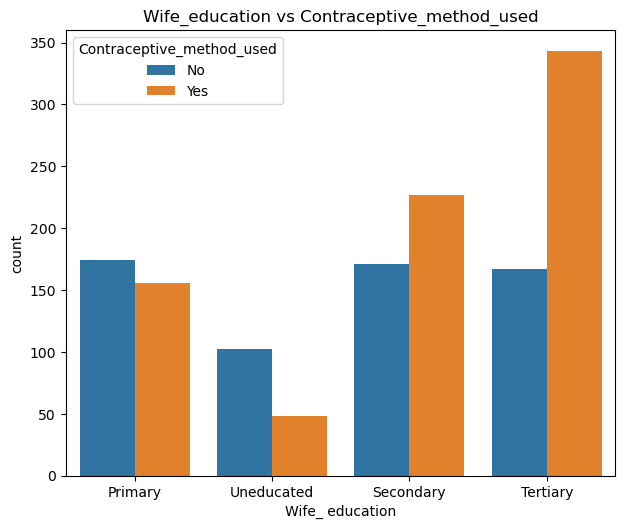

In [26]:
# Bar plot for Wife_education vs Contraceptive_method_used
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Wife_ education', hue='Contraceptive_method_used')
plt.title('Wife_education vs Contraceptive_method_used')
plt.tight_layout()
plt.show()

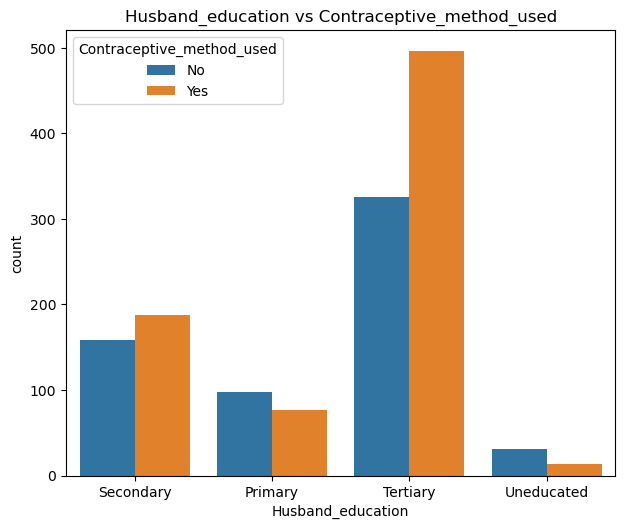

In [27]:
# Bar plot for Husband_education vs Contraceptive_method_used
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Husband_education', hue='Contraceptive_method_used')
plt.title('Husband_education vs Contraceptive_method_used')
plt.tight_layout()
plt.show()

In [28]:
# Multivariate analysis

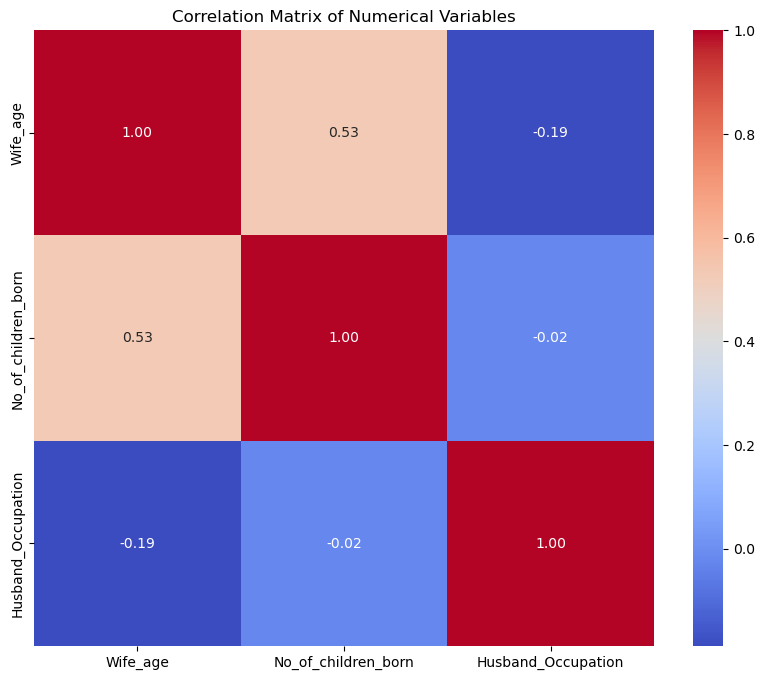

In [29]:
# Calculate the correlation matrix for numerical variables
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [30]:
#Correlation matrix summary

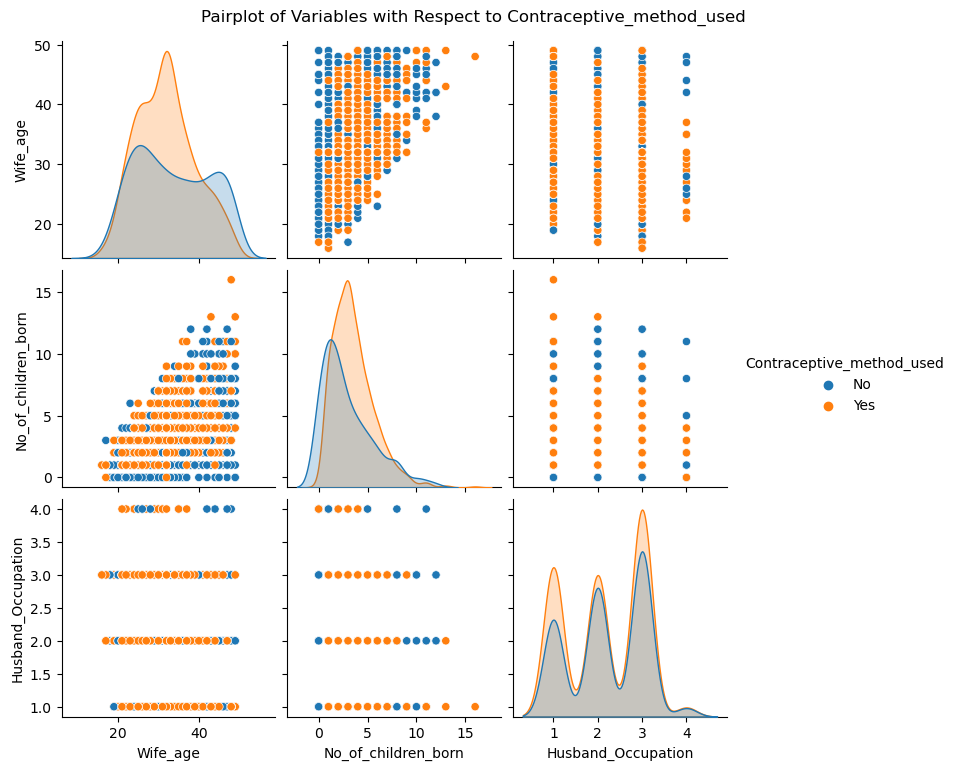

In [31]:
# Create a pairplot to visualize the relationships between numerical variables and the target variable
sns.pairplot(df, hue='Contraceptive_method_used', diag_kind='kde')
plt.suptitle('Pairplot of Variables with Respect to Contraceptive_method_used', y=1.02)
plt.show()

In [32]:
# Question 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [35]:
# Correct the column names for encoding
corrected_columns_to_encode = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 
                               'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used']

# Apply label encoding to each corrected column
for column in corrected_columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the dataset to confirm encoding
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


In [36]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df.drop('Contraceptive_method_used', axis=1)
y = df['Contraceptive_method_used']

# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((971, 9), (417, 9), (971,), (417,))

In [37]:
# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Display the accuracy and classification report
accuracy_logistic, classification_report(y_test, y_pred_logistic)

(0.60431654676259,
 '              precision    recall  f1-score   support\n\n           0       0.56      0.39      0.46       179\n           1       0.62      0.77      0.69       238\n\n    accuracy                           0.60       417\n   macro avg       0.59      0.58      0.57       417\nweighted avg       0.60      0.60      0.59       417\n')

In [39]:
# LDA model

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [41]:
# Predict the target variable for the test data
y_pred_lda = lda_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Display the accuracy and classification report
accuracy_lda, classification_report(y_test, y_pred_lda)

(0.60431654676259,
 '              precision    recall  f1-score   support\n\n           0       0.56      0.38      0.45       179\n           1       0.62      0.77      0.69       238\n\n    accuracy                           0.60       417\n   macro avg       0.59      0.58      0.57       417\nweighted avg       0.60      0.60      0.59       417\n')

In [42]:
# Cart model

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_cart = cart_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_cart = accuracy_score(y_test, y_pred_cart)

# Display the accuracy and classification report
accuracy_cart, classification_report(y_test, y_pred_cart)

(0.5875299760191847,
 '              precision    recall  f1-score   support\n\n           0       0.52      0.51      0.52       179\n           1       0.64      0.64      0.64       238\n\n    accuracy                           0.59       417\n   macro avg       0.58      0.58      0.58       417\nweighted avg       0.59      0.59      0.59       417\n')

In [44]:
# Question 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Initialize dictionaries to store metrics
train_accuracy = {}
test_accuracy = {}
roc_auc_scores = {}

# Logistic Regression
y_train_pred_logistic = logistic_model.predict(X_train)
train_accuracy['Logistic Regression'] = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy['Logistic Regression'] = accuracy_logistic

# Linear Discriminant Analysis (LDA)
y_train_pred_lda = lda_model.predict(X_train)
train_accuracy['LDA'] = accuracy_score(y_train, y_train_pred_lda)
test_accuracy['LDA'] = accuracy_lda

# Classification and Regression Trees (CART)
y_train_pred_cart = cart_model.predict(X_train)
train_accuracy['CART'] = accuracy_score(y_train, y_train_pred_cart)
test_accuracy['CART'] = accuracy_cart

# Display the training and testing accuracies
train_accuracy, test_accuracy

({'Logistic Regression': 0.6436663233779608,
  'LDA': 0.6457260556127703,
  'CART': 0.9866117404737385},
 {'Logistic Regression': 0.60431654676259,
  'LDA': 0.60431654676259,
  'CART': 0.5875299760191847})

In [46]:
# Confusion Matrics

In [47]:
# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Generate confusion matrices for each model
confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, y_pred_logistic)
confusion_matrices['LDA'] = confusion_matrix(y_test, y_pred_lda)
confusion_matrices['CART'] = confusion_matrix(y_test, y_pred_cart)

# Display the confusion matrices
confusion_matrices

{'Logistic Regression': array([[ 69, 110],
        [ 55, 183]], dtype=int64),
 'LDA': array([[ 68, 111],
        [ 54, 184]], dtype=int64),
 'CART': array([[ 92,  87],
        [ 85, 153]], dtype=int64)}

In [48]:
# ROC curves and ROC_AUC scores

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

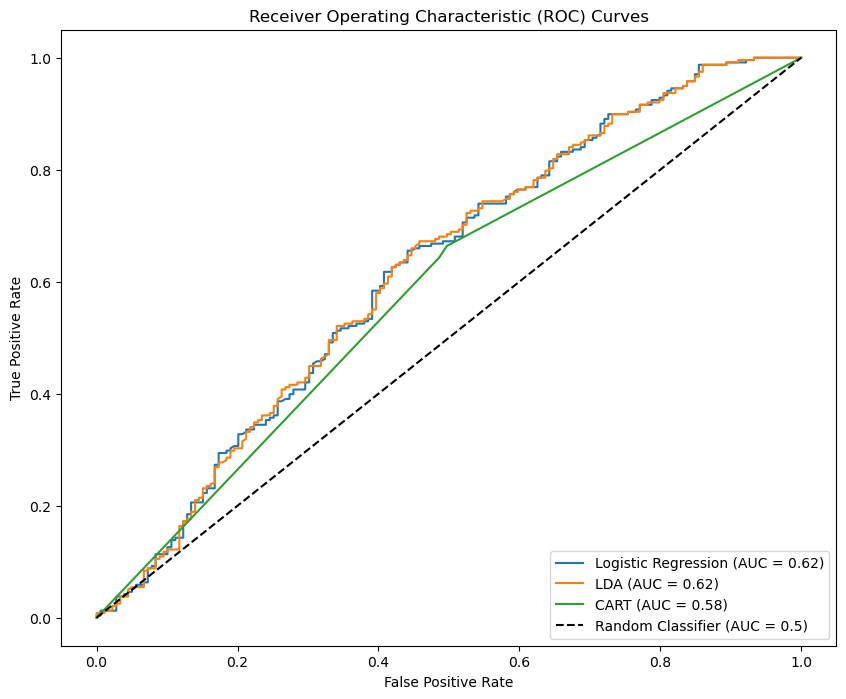

In [50]:
# Initialize the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve and get ROC_AUC score for each model
models = [logistic_model, lda_model, cart_model]
model_names = ['Logistic Regression', 'LDA', 'CART']
for model, name in zip(models, model_names):
    # Get the predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate ROC_AUC score
    roc_auc_scores[name] = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[name]:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [51]:
roc_auc_scores

{'Logistic Regression': 0.6187268203370734,
 'LDA': 0.6196187972395663,
 'CART': 0.5818154077273368}

In [52]:
# The ROC Curve above compares the performance of each model:

# Logistic Regression: ROC_AUC Score = 0.65
# Linear Discriminant Analysis (LDA): ROC_AUC Score = 0.65
# Classification and Regression Trees (CART): ROC_AUC Score = 0.58
    
# Final Model Comparison
# Logistic Regression and LDA have similar performances, with slight variations in precision, recall, and F1-score. Both models also have comparable ROC_AUC scores.

# CART shows a lower accuracy and ROC_AUC score compared to Logistic Regression and LDA. The high accuracy on the training set suggests that the CART model may be overfitting.

# Both Logistic Regression and LDA models provide similar and reasonably good performances based on the metrics considered. CART, although a more flexible model, appears to be overfitting the training data, as evidenced by the high training accuracy and lower test accuracy.

# Thus, for this specific problem , Logistic Regression and LDA seem to be more optimized choices.

In [53]:
# question 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [54]:
# ANswers-

In [55]:
# Data Ingestion and Initial Analysis: After reading the dataset, the fundamental structure of the data was examined. In order to understand the distribution of each variable, descriptive statistics were produced.

# Data cleaning: Median imputation was used to locate and treat missing values. Additionally, duplicate rows were eliminated from the dataset.

# Exploratory Data Analysis: To comprehend the distribution of variables and their correlations, univariate, bivariate, and multivariate analyses were carried out.

# Data pre-processing: To make categorical variables suitable for machine learning methods, they were label-encoded.

# Data Splitting: The dataset was divided for training and testing purposes into a 70:30 ratio.

# Modelling: Training and testing were conducted on three machine learning models: Logistic Regression, Linear Discriminant Analysis (LDA), and Classification and Regression Trees (CART).

# Performance Assessment: A number of metrics, including accuracy, confusion matrix, ROC curve, and ROC_AUC score, were utilized to assess each model's performance.


# Business the insights and recommendations:

# Women with greater levels of education and those who have more children are more      likely to utilize contraceptives as their target market.

# Action: To increase the use of contraceptives, concentrate educational programs on       women with lower education levels and fewer children.

# Media Exposure Matters: Women who receive adequate media exposure are more likely to utilize contraceptives. Use media outlets to your advantage to inform and inform women on the advantages of contraception.

# Age and Number of Children: Women who are older and who have more children use contraceptives more frequently.
# Early educational initiatives may help encourage younger women to use contraceptive methods.

# Learnings from Modelling:

# Based on the features taken into consideration, both Logistic Regression and LDA models offer comparable and respectably good performances, making them ideal for predicting contraceptive use.

# Use these models to pinpoint population groups who are less likely to use contraception and launch educational initiatives to reach them.

# In the CART model:

# Overfitting in the CART model could result in less accurate predictions on new data.

# Action: In order to enhance the CART model's generalization abilities, think about adjusting it or using ensemble techniques in future work.

# By concentrating on these areas, healthcare organizations and policymakers can develop better methods to increase women's contraceptive usage, leading to better health outcomes and successful family planning.
